In [1]:
import requests
url= "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"
try:
    httpReq = requests.get(url, proxies=None)
    print(httpReq.url)
except NameError:
    httpReq = requests.get(url)
ans=httpReq.content

http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270


In [2]:
import pandas
import io
dataframe = pandas.read_csv(io.StringIO(ans.decode('utf-8')), sep="\t", header=None)

In [3]:
set(dataframe[6])

{'psi-mi:"MI:0018"(two hybrid)',
 'psi-mi:"MI:0096"(pull down)',
 'psi-mi:"MI:0397"(two hybrid array)'}

In [4]:
import re
ids = list(set(dataframe[10]))
ids=(ids[0], ids[2], ids[3]) # no human allowed
valid=list()
interact_virus=list()
interact_human=list()

for i in dataframe.iterrows():
    if i[1][10] in ids and i[1][9] in ids:
        interact_virus.append((i[1][0].split(":")[1], i[1][1].split(":")[1]))
    else:
        interact_human.append((i[1][0].split(":")[1], i[1][1].split(":")[1]))

In [5]:
interact_virus

[('P0CW72', 'P0CW72'),
 ('P0C704', 'P14348'),
 ('P03185', 'P0CK47'),
 ('P0C731', 'Q3KSQ2'),
 ('P0CK53', 'A0A0C7TRZ7'),
 ('P0CK47', 'P03185'),
 ('Q3KST5', 'Q66542'),
 ('Q3KSS4', 'Q3KSS4'),
 ('P03209', 'Q3KSP5'),
 ('Q3KSP5', 'Q3KSP5'),
 ('P0CW72', 'Q3KSU8'),
 ('Q3KSU1', 'Q3KSU1'),
 ('Q3KSV2', 'P03206'),
 ('Q3KST2', 'Q3KSV2'),
 ('Q3KSU8', 'Q3KSU8'),
 ('Q3KSV2', 'P03225'),
 ('Q3KSU5', 'P0C704'),
 ('Q3KST2', 'Q3KST2'),
 ('P0C729', 'Q3KSS5'),
 ('Q3KST2', 'Q69119'),
 ('Q3KST0', 'Q3KSQ2'),
 ('Q3KSU5', 'P0CK58'),
 ('P03208', 'Q3KSQ2'),
 ('Q3KSQ2', 'P03209'),
 ('Q69131', 'P0C738'),
 ('P0C701', 'Q66542'),
 ('P0CK49', 'Q3KSR9'),
 ('P0C734', 'P0C6Z5'),
 ('Q3KSS3', 'A8CSJ8'),
 ('P03199', 'Q69139'),
 ('P03208', 'Q3KSS4'),
 ('P0C6Z4', 'A8CSJ8'),
 ('P0CW72', 'P0C6Z4'),
 ('A8CSJ8', 'P03199'),
 ('Q3KSU3', 'Q69139'),
 ('P03208', 'P03232'),
 ('P03208', 'P0CW72'),
 ('Q3KST1', 'P0C762'),
 ('Q69119', 'Q3KSS4'),
 ('P0C704', 'A8CSJ8'),
 ('P0CW72', 'P0CW72'),
 ('P14348', 'P0CW72'),
 ('P0CK47', 'P03185'),
 ('P0CK

<IPython.core.display.Javascript object>


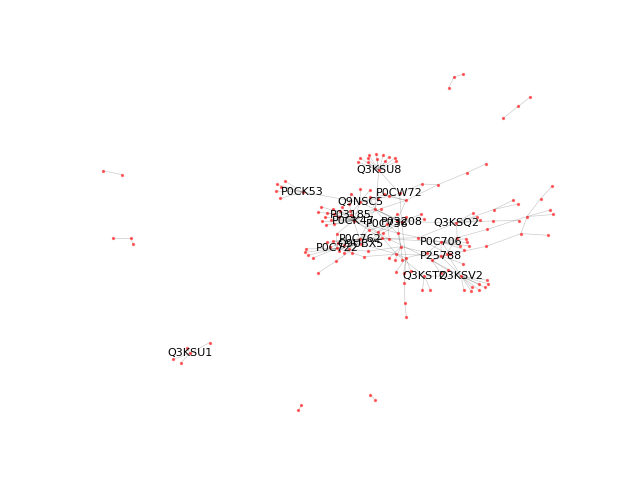

{'P0CW72': Text(0.03652171738159938, 0.2033347020608825, 'P0CW72'),
 'P03185': Text(-0.10103980572957419, 0.08488463319759869, 'P03185'),
 'P0CK53': Text(-0.2354769211191079, 0.2102925703910013, 'P0CK53'),
 'P0CK47': Text(-0.0919602494942477, 0.051837531599336954, 'P0CK47'),
 'Q3KSU1': Text(-0.5512020202863073, -0.6824884855975298, 'Q3KSU1'),
 'Q3KSV2': Text(0.20917759971143374, -0.2558787120081751, 'Q3KSV2'),
 'Q3KST2': Text(0.10622716668771502, -0.25535086976333504, 'Q3KST2'),
 'Q3KSU8': Text(-0.02137143430347871, 0.32979044199662033, 'Q3KSU8'),
 'P03208': Text(0.042092059160118586, 0.04613772162580212, 'P03208'),
 'Q3KSQ2': Text(0.1960070156874976, 0.04081700577323358, 'Q3KSQ2'),
 'Q9UBX5': Text(-0.07267187492120133, -0.07525333886557556, 'Q9UBX5'),
 'P0C762': Text(-0.07515673953805085, -0.049738286494252104, 'P0C762'),
 'Q9NSC5': Text(-0.07456554695631154, 0.15363537027416038, 'Q9NSC5'),
 'P25788': Text(0.1522432834277507, -0.14435445272030306, 'P25788'),
 'P0C736': Text(0.00230700

In [53]:
%matplotlib nbagg
import networkx as nx
import matplotlib.pyplot as plt

plt.figure()
plt.axis('off')
G = nx.Graph()
neighbors=dict()

for couple in interact_virus:
    G.add_edge(couple[0],couple[1])
    if couple[0] not in neighbors:
        neighbors[couple[0]]=list()
    neighbors[couple[0]].append(couple[1])

labels=dict()
display_nodes=list()
for i in neighbors:
    if len(neighbors[i]) > 3:
        labels[i]=i
        display_nodes.append(i)

pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="red",  node_shape="o", node_size=2, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=8,font_color='black', labels=labels)

In [54]:
from xml.etree.ElementTree import parse, dump, fromstring, register_namespace, ElementTree

# Utility functions
# Extracting All go terms relative to provided UNIPROT accessor
def goTerms(xmlEntry):
    ns = '{http://uniprot.org/uniprot}'
    goTerms = xmlEntry.findall(ns +'dbReference[@type="GO"]')
    goTermList = []
    for goT in goTerms:
        gID   = goT.attrib['id']
        gName = goT.find(ns +'property[@type="term"]').attrib['value']
        goTermList.append({"name" : gName, "ID" : gID})
    return goTermList

# Return information about provided UNIPROT accessor as python dictionary
def proteinDict(uniprotID, root):
    ns   = '{http://uniprot.org/uniprot}'

    data = { "accession" : uniprotID,
             "geneName" : None,
             "name" : None,
             "GOterms" : None
           }

    for entry in root.findall(ns+'entry'):
        accessions = entry.findall(ns+"accession")
        for acc in accessions:
            if acc.text == uniprotID: # entry is the node matching provided UNIPROT accessor
                e = entry.find(f"{ns}protein/{ns}recommendedName/{ns}fullName")
                if not e is None:
                    data["name"] = e.text
                e = entry.find(f"{ns}gene/{ns}name")
                if not e is None:
                    data["geneName"] = e.text

                data["GOterms"] = goTerms(entry)
                return data
    raise ValueError(f"{uniprotID} nor found in XML document")

<IPython.core.display.Javascript object>


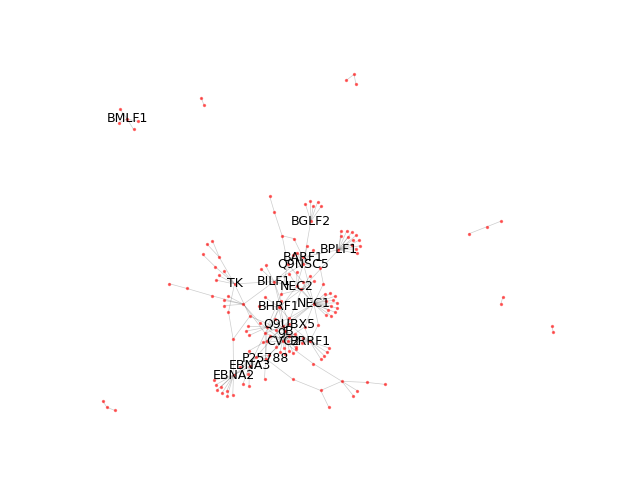

{'P0CW72': Text(0.05630588213777072, 0.1516286056064124, 'BARF1'),
 'P03185': Text(0.03355814760997726, 0.03950814613964395, 'NEC2'),
 'P0CK53': Text(0.08610232130112776, 0.2899151236815311, 'BGLF2'),
 'P0CK47': Text(0.09755668844603045, -0.02837896231069121, 'NEC1'),
 'Q3KSU1': Text(-0.6054265596468964, 0.6866868660160542, 'BMLF1'),
 'Q3KSV2': Text(-0.2046128708435546, -0.30549179853319497, 'EBNA2'),
 'Q3KST2': Text(-0.14427039960363408, -0.26895629707259855, 'EBNA3'),
 'Q3KSU8': Text(0.19039890799805018, 0.1797701994319108, 'BPLF1'),
 'P03208': Text(-0.052065504585464405, 0.056744109954227545, 'BILF1'),
 'Q3KSQ2': Text(-0.20087107566323134, 0.04744093142043182, 'TK'),
 'Q9UBX5': Text(0.004155464413632184, -0.10702132173644088, 'Q9UBX5'),
 'P0C762': Text(-0.010488772920338008, -0.13484749414701153, 'gB'),
 'Q9NSC5': Text(0.05838568988957844, 0.12569657740610585, 'Q9NSC5'),
 'P25788': Text(-0.0836345139345381, -0.24129252611354812, 'P25788'),
 'P0C736': Text(-0.03537460049301155, -0.04

In [60]:
## redraw network with nice names ##
%matplotlib nbagg
import networkx as nx
import matplotlib.pyplot as plt

plt.figure()
plt.axis('off')
G = nx.Graph()
neighbors=dict()

for couple in interact_virus:
    G.add_edge(couple[0],couple[1])
    if couple[0] not in neighbors:
        neighbors[couple[0]]=list()
    neighbors[couple[0]].append(couple[1])

tree=parse("data/Calderwood_EBV_proteome.xml")
root=tree.getroot()
labels=dict()
display_nodes=list()
for i in neighbors:
    if len(neighbors[i]) > 3:
        try:
            labels[i]=proteinDict(i, root)["geneName"]
        except:
            labels[i]=i
        display_nodes.append(i)

pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="red",  node_shape="o", node_size=2, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=9,font_color='black', labels=labels)